In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
pd.set_option('display.max_rows', 100)

# Import Data

In [16]:
path_to_protest_data = "./local/data/"
filename = "full.csv"
protests = pd.read_csv(path_to_protest_data+filename)
protests.shape

(12652, 29)

In [17]:
features = ['region', 'libdem',
       'HDI_Score', 'violenceStatus', 'accomodation']

num_features = ['libdem',
       'HDI_Score', 'violenceStatus', 'accomodation']

# K means

In [18]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), ['libdem',
       'HDI_Score', 'violenceStatus', 'accomodation']),
    ("cat", OneHotEncoder(), ['region'])
])

data_transformed = preprocessor.fit_transform(protests[features].dropna())


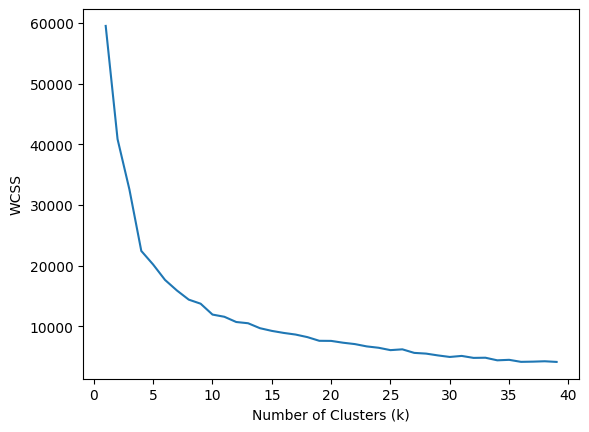

In [19]:
withins = []

for k in range(1,40):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_transformed)
    withins.append(kmeans.inertia_)

plt.plot(range(1,40), withins)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [36]:
kmeans = KMeans(n_clusters=8, random_state=37)
clusters = kmeans.fit_predict(data_transformed)
protests.loc[protests[features].notna().all(axis=1), 'cluster'] = clusters


In [37]:
silhouette_score(data_transformed, clusters)

0.3618796601780416

In [38]:
protests['cluster'].value_counts()

cluster
1.0    3166
7.0    2075
4.0    1810
2.0    1654
5.0    1354
3.0    1268
6.0     807
0.0     302
Name: count, dtype: int64

In [39]:
protests.groupby('cluster')['Year'].agg(['min','max','mean'])

,min,max,mean
cluster,,,
0.0,1990,2019,2005.549669
1.0,1990,2019,2006.554643
2.0,1990,2019,2007.496977
3.0,1990,2019,2006.657729
4.0,1990,2019,2006.539227
5.0,1990,2019,2006.889217
6.0,1990,2019,2006.824040
7.0,1990,2019,2007.191807


<Axes: xlabel='region', ylabel='count'>

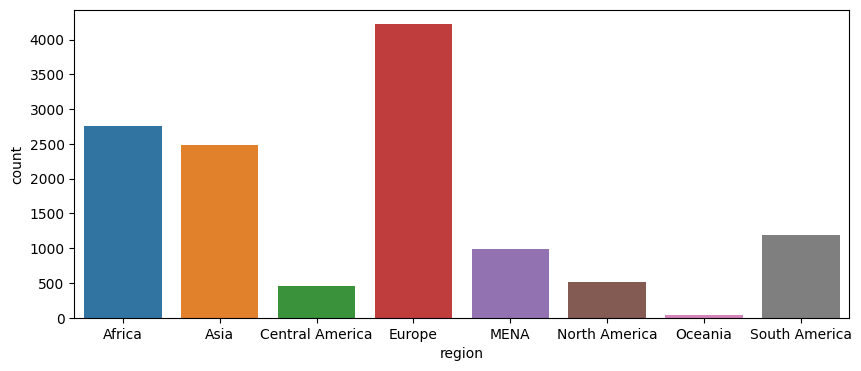

In [40]:
plt.figure(figsize=(10,4))
sns.barplot(x='region', y='count', hue='region', data=protests['region'].value_counts().reset_index().sort_values('region'))

<Axes: xlabel='cluster', ylabel='count'>

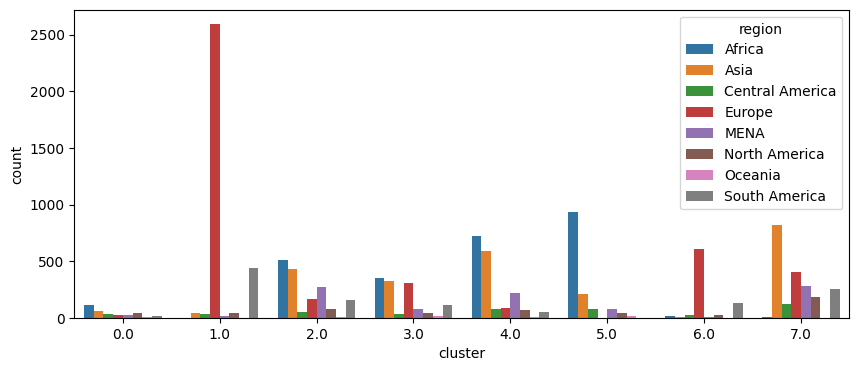

In [41]:
plt.figure(figsize=(10,4))
sns.barplot(x='cluster', y='count', hue='region', data=protests.groupby('cluster')['region'].value_counts().reset_index().sort_values('region'))

In [53]:
pd.crosstab(protests['region'], protests['cluster'], normalize='columns').transpose().div(protests['region'].value_counts(normalize=True))

region,Africa,Asia,Central America,Europe,MENA,North America,Oceania,South America
cluster,,,,,,,,
0.0,1.744953,1.045244,2.879635,0.208576,0.852371,3.222618,2.204949,0.385313
1.0,0.001447,0.069150,0.301266,2.454760,0.069110,0.307401,0.000000,1.470177
2.0,1.412952,1.314393,0.865002,0.295600,2.077693,1.073849,0.805193,1.016927
3.0,1.279313,1.296929,0.796464,0.733323,0.771436,0.863474,3.676075,0.917701
4.0,1.822832,1.648359,1.146927,0.137547,1.543074,0.940969,1.103693,0.315605
5.0,3.171127,0.800928,1.574627,0.000000,0.731944,0.700812,2.950789,0.000000
6.0,0.073818,0.025236,0.869059,2.241281,0.111643,0.844190,0.000000,1.664785
7.0,0.006625,2.009549,1.676433,0.585450,1.742986,2.169249,0.000000,1.315315


In [61]:
pd.crosstab(protests['region'], protests['cluster'], normalize='index').div(protests['cluster'].value_counts(normalize=True))

cluster,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
region,,,,,,,,
Africa,1.784984,0.001481,1.445367,1.308662,1.864650,3.243877,0.075512,0.006777
Asia,1.030717,0.068189,1.296126,1.278904,1.625450,0.789797,0.024885,1.981621
Central America,2.830472,0.296123,0.850235,0.782866,1.127346,1.547744,0.854222,1.647812
Europe,0.207077,2.437119,0.293476,0.728052,0.136559,0.000000,2.225174,0.581242
MENA,0.856108,0.069413,2.086803,0.774818,1.549840,0.735153,0.112132,1.750628
North America,3.167601,0.302153,1.055516,0.848732,0.924904,0.688848,0.829778,2.132215
Oceania,2.167306,0.000000,0.791447,3.613316,1.084850,2.900412,0.000000,0.000000
South America,0.390826,1.491211,1.031475,0.930831,0.320120,0.000000,1.688603,1.334132


<Axes: xlabel='region'>

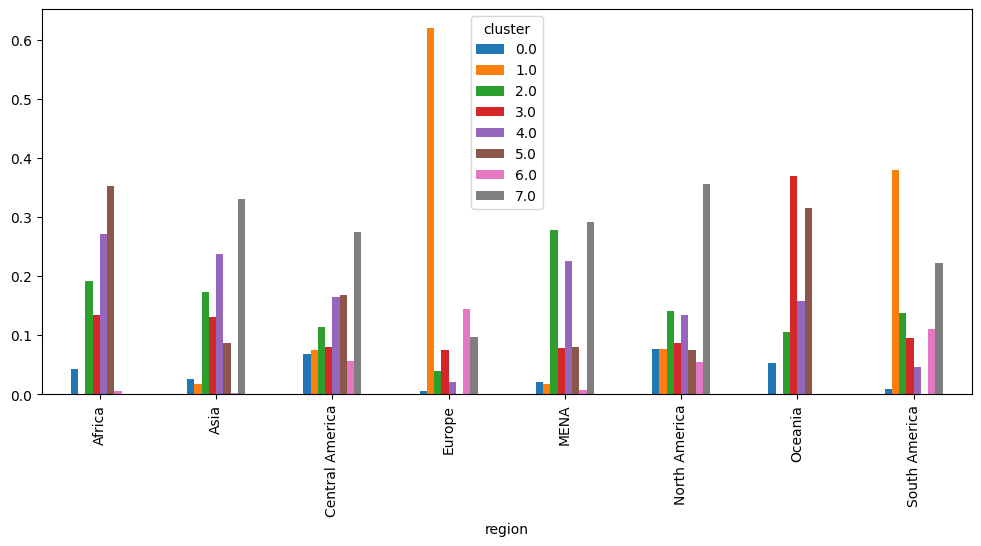

In [44]:
pd.crosstab(protests['region'], protests['cluster'], normalize='index').plot.bar(figsize=(12,5))

In [48]:
protests.groupby('cluster')[num_features].mean().rank()

,libdem,HDI_Score,protesterviolence,stateviolence,accomodation
cluster,,,,,
0.0,4.0,3.0,7.0,2.0,4.0
1.0,8.0,8.0,2.5,4.0,4.0
2.0,1.0,4.0,2.5,7.5,4.0
3.0,6.0,5.0,5.0,5.0,8.0
4.0,2.0,2.0,7.0,7.5,4.0
5.0,5.0,1.0,2.5,2.0,4.0
6.0,7.0,7.0,7.0,6.0,4.0
7.0,3.0,6.0,2.5,2.0,4.0


In [46]:
protests.groupby('cluster')[['violenceStatus','accomodation']].mean()

,violenceStatus,accomodation
cluster,,
0.0,1.000000,0.0
1.0,0.124447,0.0
2.0,1.000000,0.0
3.0,0.393533,1.0
4.0,1.000000,0.0
5.0,0.000000,0.0
6.0,1.000000,0.0
7.0,0.000000,0.0


# K Means- Separate Violence

In [62]:
features = ['region', 'libdem',
       'HDI_Score', 'protesterviolence','stateviolence', 'accomodation']

num_features = ['libdem',
       'HDI_Score', 'protesterviolence','stateviolence', 'accomodation']

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), ['libdem',
       'HDI_Score', 'protesterviolence','stateviolence', 'accomodation']),
    ("cat", OneHotEncoder(), ['region'])
])

data_transformed = preprocessor.fit_transform(protests[features].dropna())

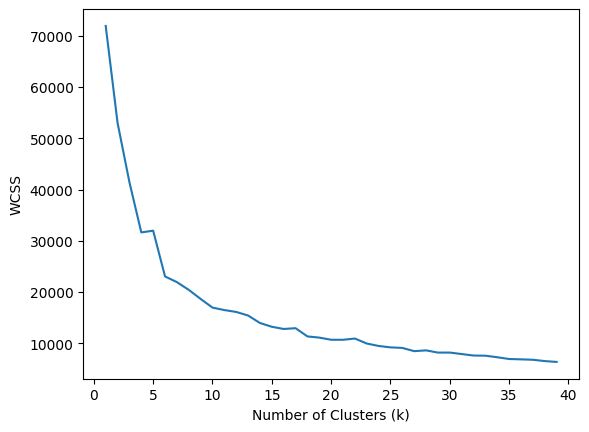

In [63]:
withins = []

for k in range(1,40):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_transformed)
    withins.append(kmeans.inertia_)

plt.plot(range(1,40), withins)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [64]:
kmeans = KMeans(n_clusters=6, random_state=34)
clusters = kmeans.fit_predict(data_transformed)
protests.loc[protests[features].notna().all(axis=1), 'cluster2'] = clusters

In [65]:
silhouette_score(data_transformed, clusters)

0.379749086719726

In [71]:
protests['cluster2'].value_counts()

cluster2
4.0    3393
3.0    2808
2.0    2134
1.0    1604
5.0    1268
0.0    1229
Name: count, dtype: int64

In [11]:
protests.groupby('cluster2')[['protesterviolence','stateviolence','violenceStatus','accomodation']].mean()

,protesterviolence,stateviolence,violenceStatus,accomodation
cluster2,,,,
0.0,0.701258,0.904874,1.000000,0.0
1.0,0.517928,0.960558,1.000000,0.0
2.0,0.165105,0.259306,0.281084,0.0
3.0,0.234343,0.246465,0.305051,1.0
4.0,0.021821,0.000000,0.021821,0.0
5.0,0.305304,0.382924,0.450194,1.0


In [12]:
protests.groupby('cluster2')[['protesterviolence','stateviolence','accomodation']].mean().rank()

,protesterviolence,stateviolence,accomodation
cluster2,,,
0.0,6.0,5.0,2.5
1.0,5.0,6.0,2.5
2.0,2.0,3.0,2.5
3.0,3.0,2.0,5.5
4.0,1.0,1.0,2.5
5.0,4.0,4.0,5.5


In [236]:
violence = pd.DataFrame({group: 
 {'peaceful': round((1-protests.loc[protests['cluster2']==group, 'violenceStatus'].sum()/(protests['cluster2']==group).sum()),2),
 'violent protests': round(protests.loc[protests['cluster2']==group, 'protesterviolence'].sum()/(protests['cluster2']==group).sum(),2),
 'met with violence': round(protests.loc[(protests['cluster2']==group) & (protests['protesterviolence']), 'stateviolence'].sum()/((protests['cluster2']==group) & (protests['protesterviolence'])).sum(),2),
 'state violence only': round(protests.loc[(protests['cluster2']==group) & (protests['protesterviolence']==0), 'stateviolence'].sum()/(protests['cluster2']==group).sum(),2)
 }
for group in range(6)}).transpose()

violence.rank(method='max')

,peaceful,violent protests,met with violence,state violence only
0,2.0,6.0,4.0,5.0
1,2.0,5.0,6.0,6.0
2,5.0,2.0,5.0,3.0
3,4.0,3.0,2.0,2.0
4,6.0,1.0,1.0,1.0
5,3.0,4.0,3.0,4.0


In [13]:
protests.groupby('cluster2')[num_features].mean().rank()

,Electoral_Score,Liberal_Score,Participatory_Score,Deliberative_Score,Egalitarian_Score,HDI_Score,protesterviolence,stateviolence,accomodation
cluster2,,,,,,,,,
0.0,4.0,4.0,4.0,4.0,4.0,3.0,6.0,5.0,2.5
1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,6.0,2.5
2.0,6.0,6.0,6.0,6.0,6.0,6.0,2.0,3.0,2.5
3.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,2.0,5.5
4.0,3.0,3.0,3.0,3.0,3.0,4.0,1.0,1.0,2.5
5.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,5.5


<Axes: xlabel='region', ylabel='count'>

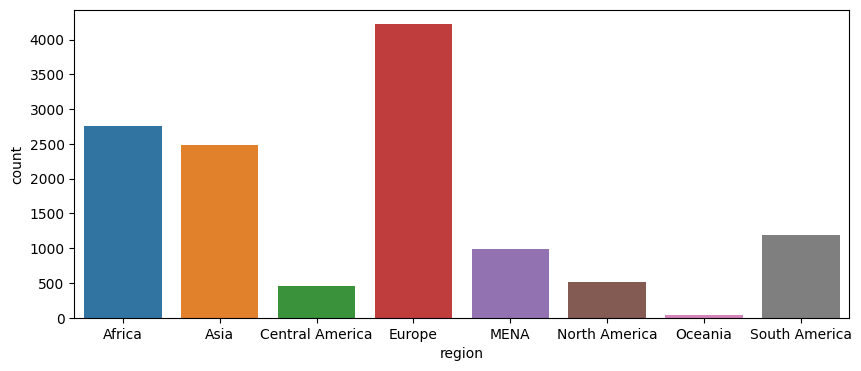

In [241]:
plt.figure(figsize=(10,4))
sns.barplot(x='region', y='count', hue='region', data=protests['region'].value_counts().reset_index().sort_values('region'))

<Axes: xlabel='cluster2', ylabel='count'>

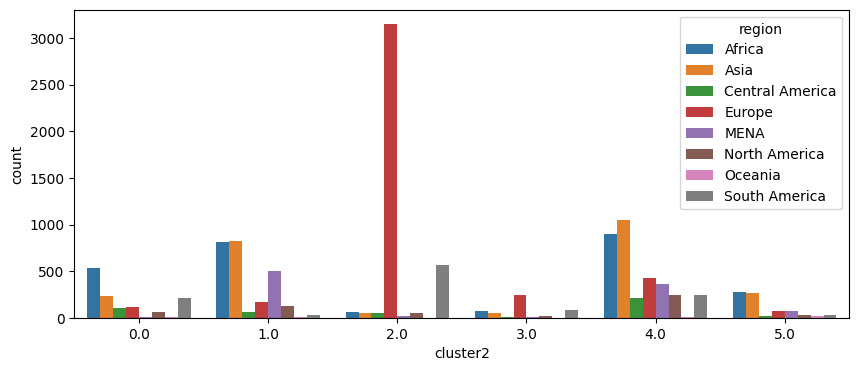

In [237]:
plt.figure(figsize=(10,4))
sns.barplot(x='cluster2', y='count', hue='region', data=protests.groupby('cluster2')['region'].value_counts().reset_index().sort_values('region'))

In [238]:
pd.crosstab(protests['region'], protests['cluster2'], normalize='columns')

cluster2,0.0,1.0,2.0,3.0,4.0,5.0
region,,,,,,
Africa,0.416667,0.322709,0.016713,0.149495,0.259820,0.362225
Asia,0.185535,0.327490,0.011902,0.113131,0.305208,0.345408
Central America,0.080975,0.023506,0.011649,0.026263,0.060227,0.029754
Europe,0.093553,0.067729,0.796911,0.488889,0.125109,0.087969
MENA,0.008648,0.198008,0.004811,0.010101,0.104452,0.091850
North America,0.045597,0.048207,0.013928,0.040404,0.070119,0.032342
Oceania,0.005503,0.001594,0.000000,0.000000,0.003782,0.018111
South America,0.163522,0.010757,0.144087,0.171717,0.071283,0.032342


In [23]:
pd.crosstab(protests['region'], protests['cluster2'], normalize='index').div(protests['cluster2'].value_counts(normalize=True))

cluster2,0.0,1.0,2.0,3.0,4.0,5.0
region,,,,,,
Africa,1.953135,1.512707,0.078343,0.700761,1.217911,1.697939
Asia,0.931493,1.644193,0.059754,0.567986,1.532324,1.734149
Central America,2.232823,0.648160,0.321200,0.724173,1.660715,0.820451
Europe,0.278599,0.201695,2.373175,1.455896,0.372571,0.261969
MENA,0.111792,2.559696,0.062197,0.130578,1.350270,1.187366
North America,1.090481,1.152893,0.333083,0.966278,1.676930,0.773460
Oceania,1.800976,0.521535,0.000000,0.000000,1.237830,5.927146
South America,1.754581,0.115422,1.546046,1.842515,0.764863,0.347023


<Axes: xlabel='region'>

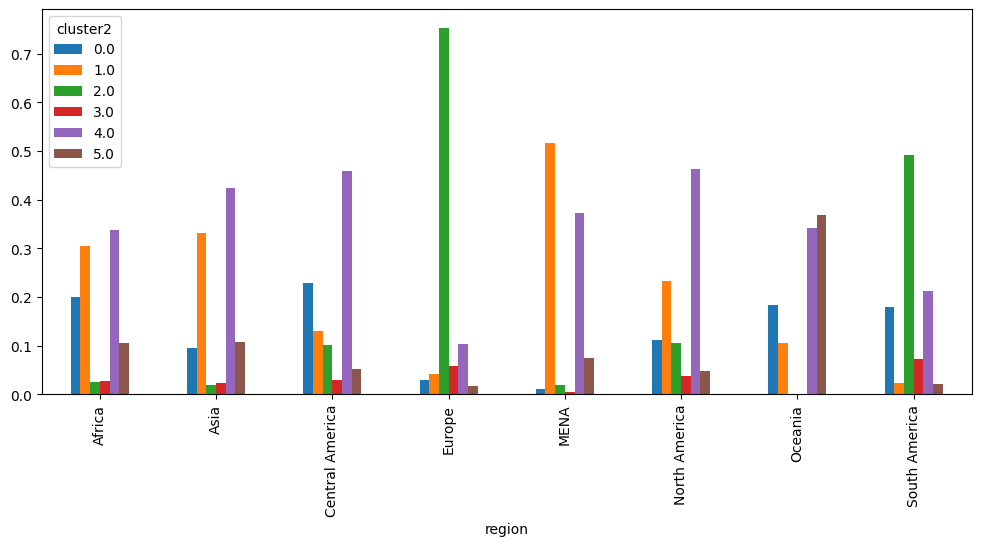

In [14]:
pd.crosstab(protests['region'], protests['cluster2'], normalize='index').plot.bar(figsize=(12,5))